**Importing libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**Loading the dataset**

In [ ]:
(X_train,Y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data()

**Scaling the data**

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
len(X_train) # Number of images we have in training dataset

60000

In [ ]:
len(X_test) #Number of images we have in the testing dataset

10000

In [ ]:
X_train[0].shape # Resolution of each image

(28, 28)

In [ ]:
X_train[0] #sample of how the numbers look like in a matrix form

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

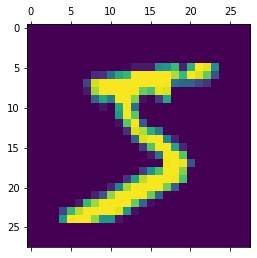

In [ ]:
plt.matshow(X_train[0]) #Seeing which number X_train[0] has

In [ ]:
Y_train[0] # Seeing what the number actually is

5

In [ ]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

**Flattening the dataset**

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)


In [ ]:
X_test_flattened.shape

(10000, 784)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Defining and training the neural network**

In [ ]:
model = keras.Sequential([
                  keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,Y_train,epochs=7)


Epoch 1/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4668 - accuracy: 0.8791
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9154
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9215
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9240
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9262
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2618 - accuracy: 0.9272
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2580 - accuracy: 0.9279


**Evaluating the performance on the test data**


In [ ]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2629 - accuracy: 0.9258


[0.26286980509757996, 0.9258000254631042]

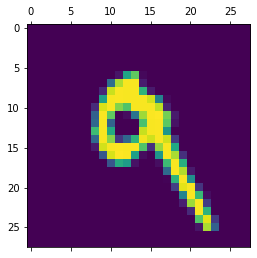

In [ ]:
plt.matshow(X_test[7])#Seeing what the first number is...

In [ ]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted[7]

array([3.9630746e-07, 1.4388490e-01, 1.2551457e-02, 3.3236653e-02,
       2.7012557e-01, 2.2262585e-01, 8.7761879e-04, 2.6677519e-02,
       7.4857444e-02, 9.7768551e-01], dtype=float32)

In [ ]:
np.argmax(Y_predicted[7])

9

In [ ]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

**Building the Confusion matrix**


In [ ]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 948,    0,    4,    2,    0,    6,   13,    4,    3,    0],
       [   0, 1109,    5,    2,    0,    1,    4,    2,   12,    0],
       [   3,    7,  936,   13,    9,    3,   12,   12,   34,    3],
       [   1,    0,   22,  924,    0,   25,    2,   14,   17,    5],
       [   1,    1,    7,    2,  916,    0,   11,    5,    9,   30],
       [   7,    2,    4,   33,   10,  777,   19,    8,   27,    5],
       [   6,    3,    6,    1,    7,    8,  924,    2,    1,    0],
       [   1,    6,   22,    6,    5,    0,    0,  967,    2,   19],
       [   5,    6,    8,   25,    8,   28,   12,   15,  862,    5],
       [   8,    7,    3,   12,   31,    7,    0,   35,    4,  902]],
      dtype=int32)>

**Confusion matrix visualization**

Text(42.0, 0.5, 'Truth')

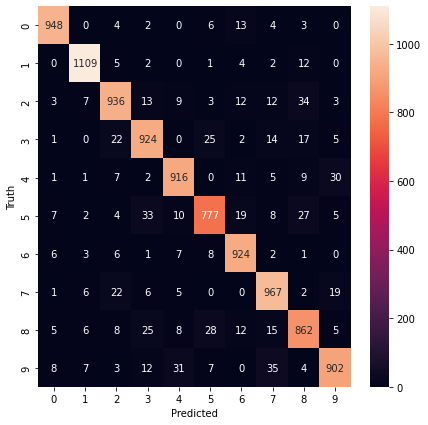

In [ ]:
import seaborn as sn
plt.figure(figsize = (7,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


**Adding a hidden layer**


In [ ]:
model = keras.Sequential([
                  keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                  keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,Y_train,epochs=7)


Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2772 - accuracy: 0.9204
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1244 - accuracy: 0.9642
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0894 - accuracy: 0.9733
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.9793
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0551 - accuracy: 0.9831
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0433 - accuracy: 0.9866
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0356 - accuracy: 0.9890


In [ ]:
model.evaluate(X_test_flattened,Y_test)#evaluating this new model

313/313 [==============================] - 1s 1ms/step - loss: 0.0736 - accuracy: 0.9777


[0.07360223680734634, 0.9776999950408936]

Text(42.0, 0.5, 'Truth')

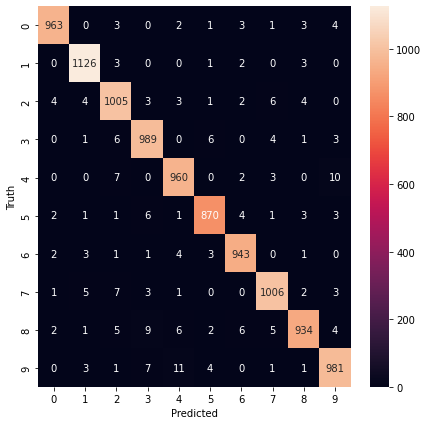

In [ ]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
plt.figure(figsize = (7,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
model = keras.Sequential([
                  keras.layers.Flatten(input_shape=(28,28)),#training the model with a built in function from keras
                  keras.layers.Dense(100,activation='relu'),
                  keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(
    optimizer='adamax',loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,Y_train,epochs=7,callbacks=[tb_callback])


Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3906 - accuracy: 0.8955
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2217 - accuracy: 0.9377
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1769 - accuracy: 0.9493
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1493 - accuracy: 0.9582
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1297 - accuracy: 0.9639
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1146 - accuracy: 0.9675
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1029 - accuracy: 0.9710


**Let's now train the data using a CNN and see how it performs**

In [ ]:
X_train_reshape = X_train.reshape(-1,28,28,1)
X_train_reshape.shape

(60000, 28, 28, 1)

In [ ]:
X_test_reshape = X_test.reshape(-1,28,28,1)
X_test_reshape.shape


(10000, 28, 28, 1)

In [ ]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=33, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((3, 3)),
    
    keras.layers.Conv2D(filters=61, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((3, 3)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train_reshape, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2000 - accuracy: 0.9413
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0574 - accuracy: 0.9818
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0411 - accuracy: 0.9865
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0337 - accuracy: 0.9889
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0268 - accuracy: 0.9909


We can see that with the same number of epochs in ANN we got around 98.31% ad here in CNN we got around 99.09% and it's good . On running for more number of epochs the change we will notice will be significant

In [ ]:
cnn.evaluate(X_test_reshape,Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0289 - accuracy: 0.9900


[0.028916211798787117, 0.9900000095367432]

Let's now do some predictions

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.7851424e-07, 1.0820991e-06, 8.7178560e-06, 1.9457017e-05,
        4.1796261e-10, 5.3036939e-07, 6.4564171e-10, 9.9996722e-01,
        1.3768653e-06, 1.3405983e-06],
       [5.9669350e-07, 9.0513013e-06, 9.9998879e-01, 3.0297960e-07,
        4.8892996e-09, 1.6956765e-12, 2.8118097e-07, 4.3524270e-08,
        9.3801833e-07, 1.6491741e-08],
       [5.6522003e-07, 9.9991167e-01, 3.5971898e-05, 2.2330122e-08,
        1.0857482e-05, 1.6193731e-07, 2.8393873e-07, 3.9730552e-05,
        3.1277884e-07, 3.6679458e-07],
       [9.9815947e-01, 4.1933510e-12, 1.8783353e-09, 1.5209002e-11,
        6.1554123e-11, 2.9532023e-07, 1.8395144e-03, 1.3878356e-08,
        6.5255881e-07, 8.6476994e-08],
       [5.0172876e-08, 4.3166404e-09, 5.7584629e-08, 1.4051880e-08,
        9.9969244e-01, 6.3721080e-07, 1.4298956e-04, 1.3631633e-08,
        3.0666324e-06, 1.6080997e-04]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

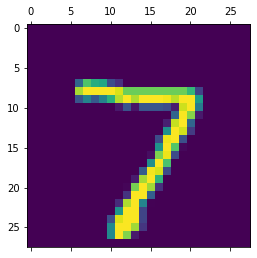

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_classes[0]

7

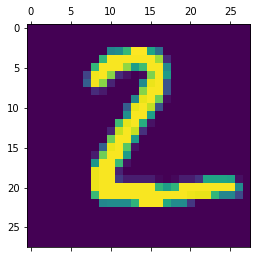

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_classes[1]

2

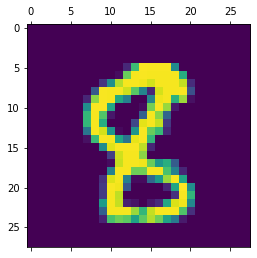

In [ ]:
plt.matshow(X_test[373])

In [ ]:
y_classes[373]

8

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      1.00       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

